In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn

In [5]:
df = pd.read_csv("water_potability.csv")
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.0 KB


In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

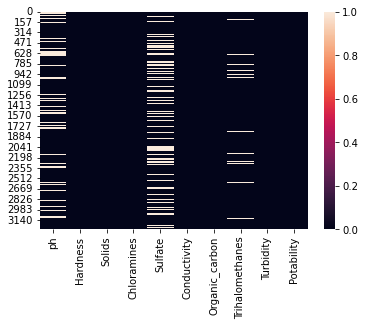

In [10]:
sns.heatmap(df.isnull())

<AxesSubplot:>

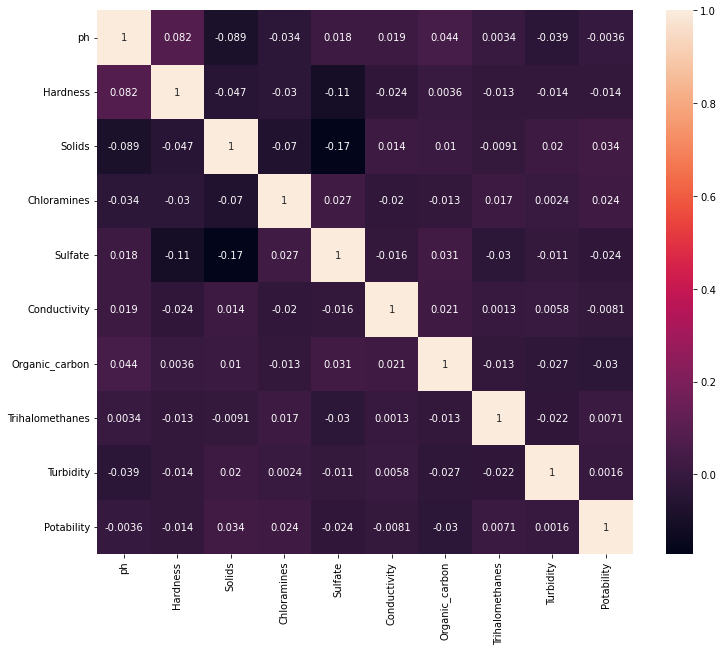

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Potability', ylabel='count'>

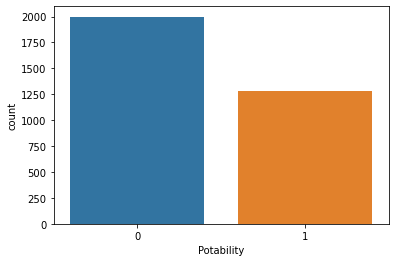

In [15]:
sns.countplot(x="Potability",data=df)

In [17]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

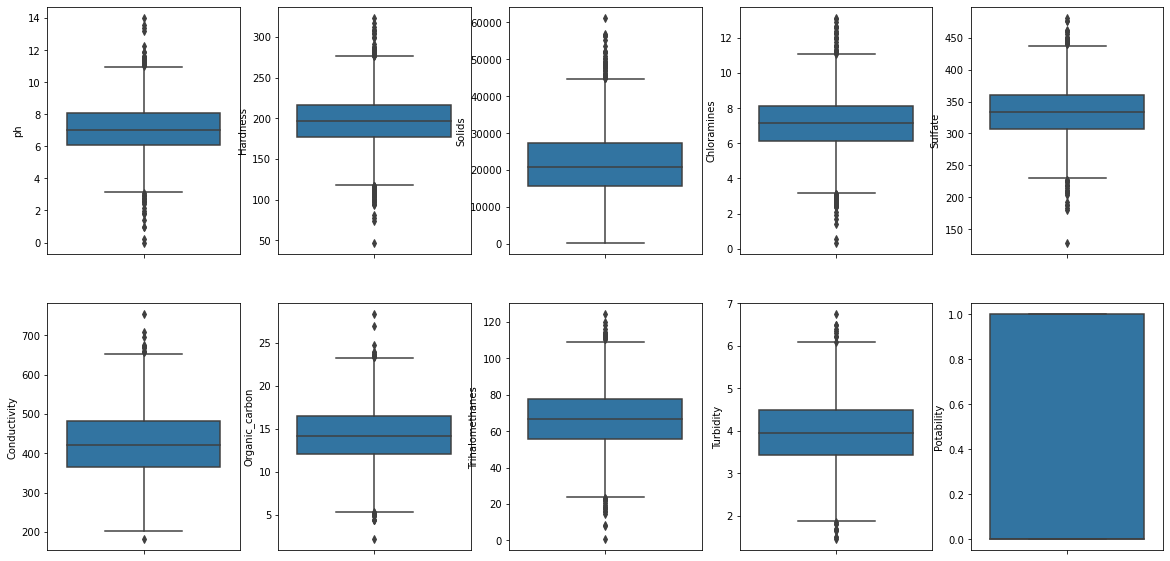

In [20]:
fig,ax = plt.subplots(ncols=5,nrows=2,figsize=(20,10))
ax = ax.flatten()
index =0
for col,value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1

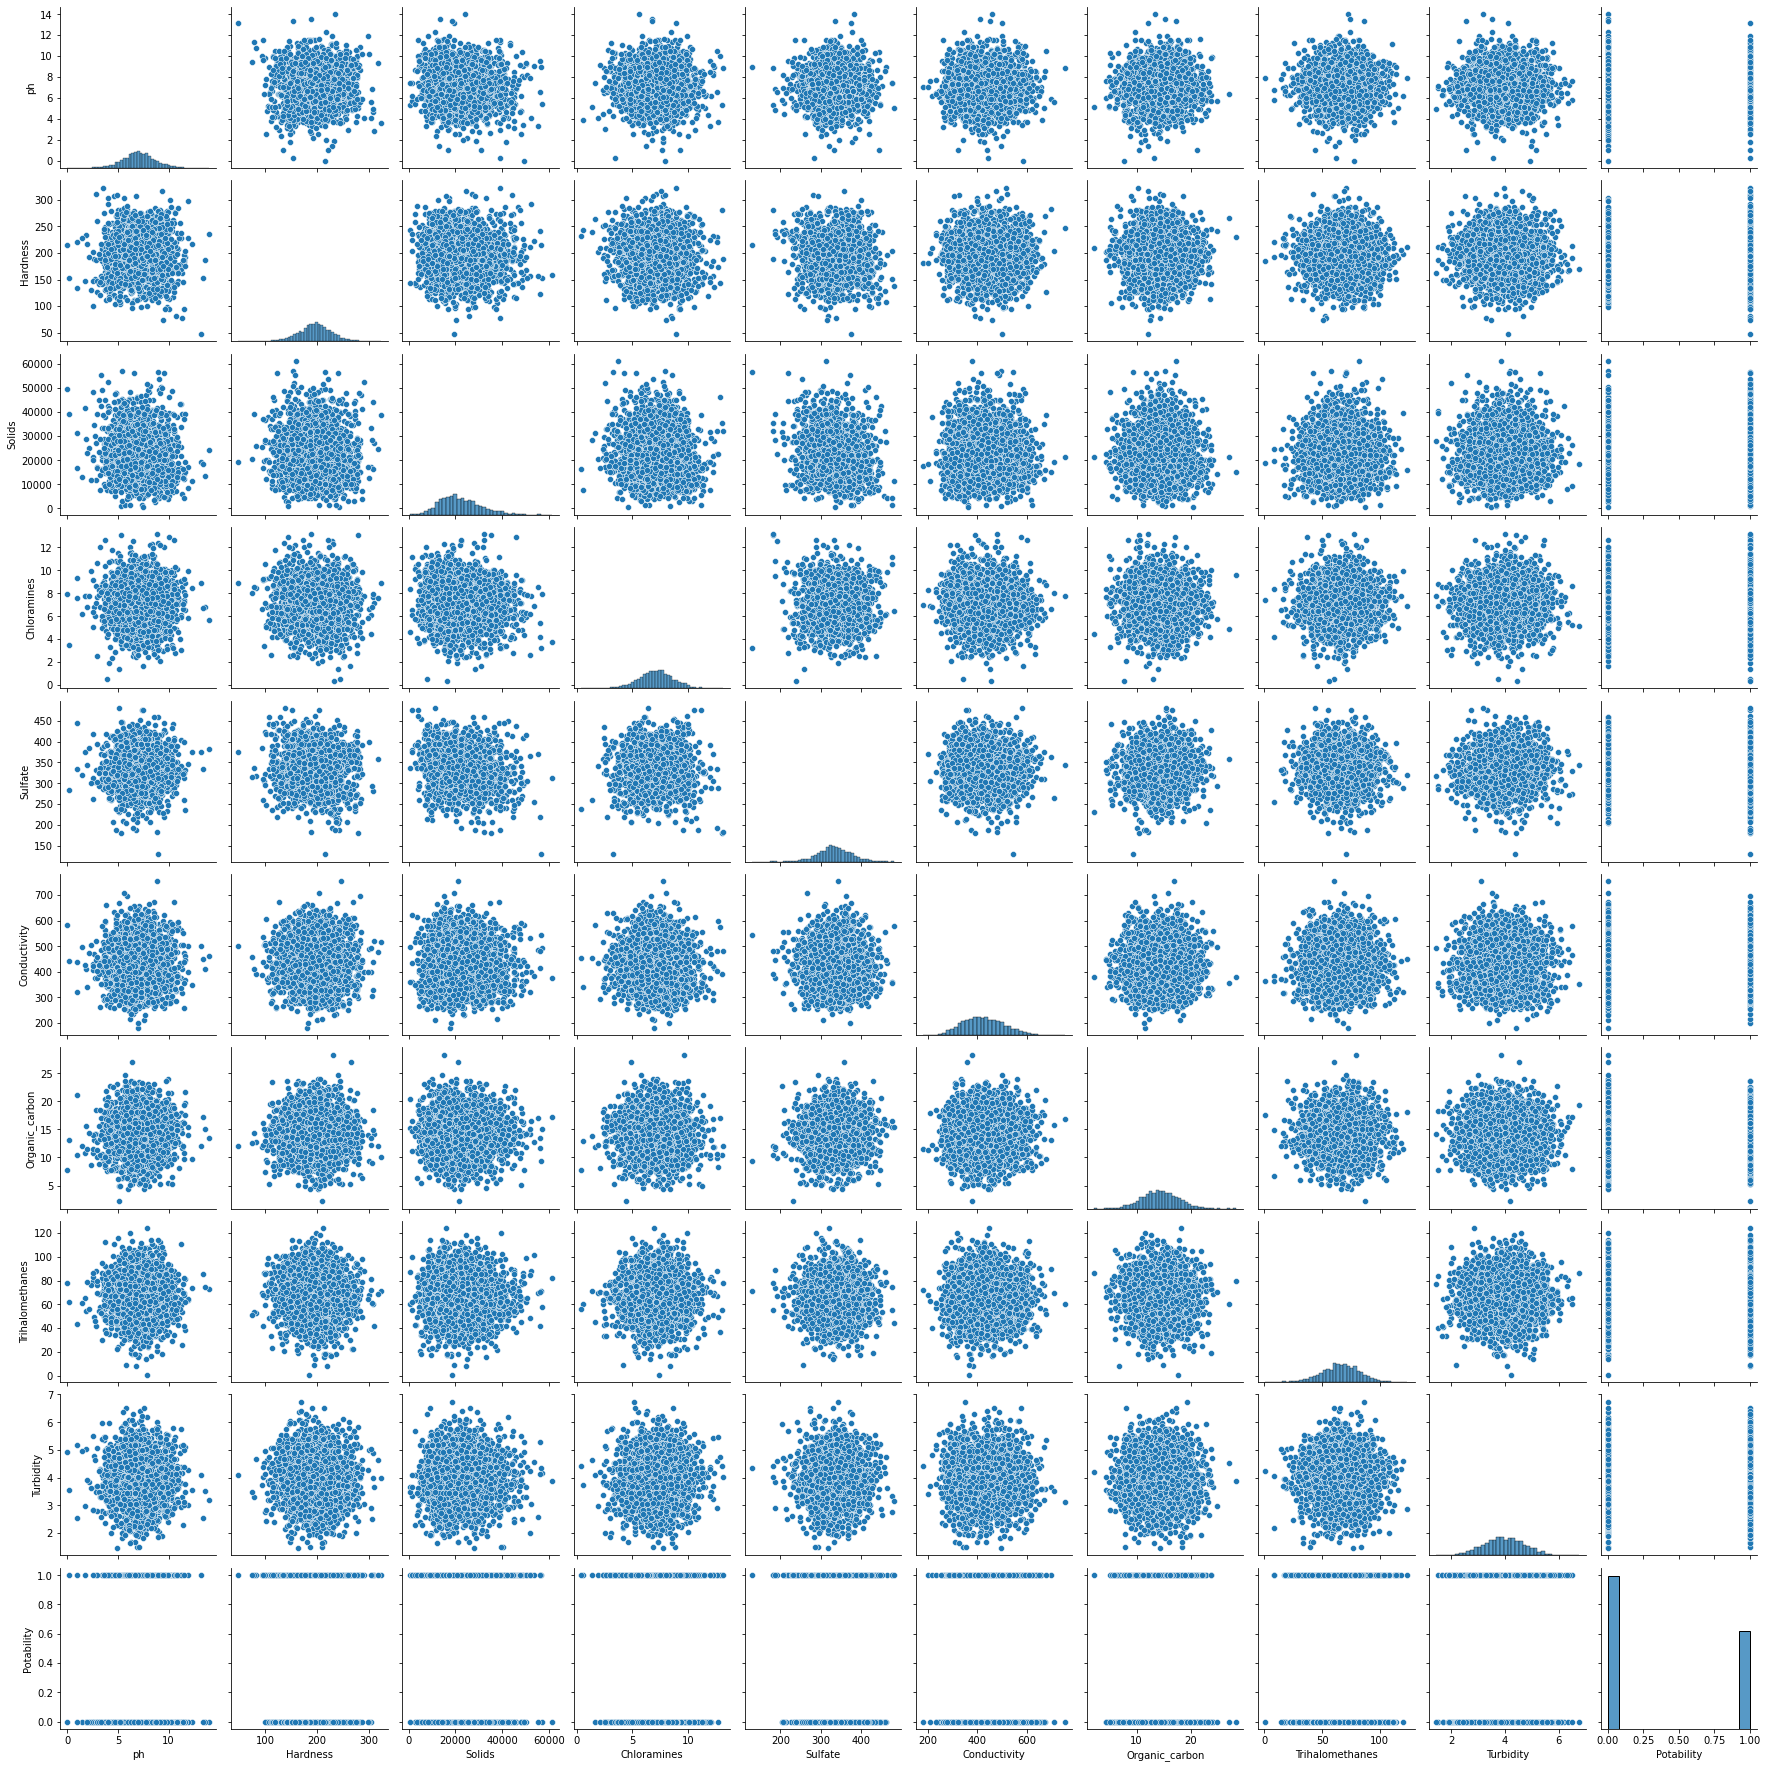

In [21]:
sns.pairplot(df)

In [23]:
fig = px.pie(df,names="Potability",hole=0.4)
fig.show()

In [25]:
fig = px.scatter(df,x="ph",color = "Potability" ,y="Sulfate")
fig.show()

<AxesSubplot:>

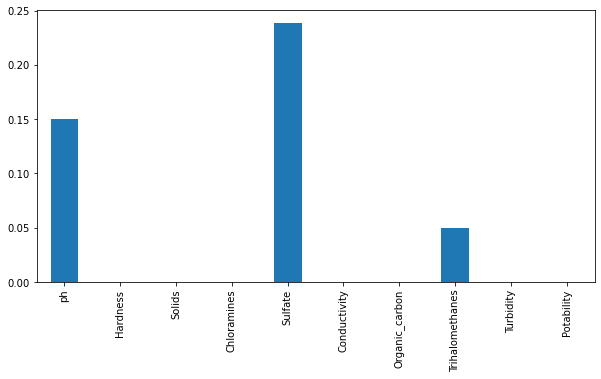

In [26]:
df.isnull().mean().plot.bar(figsize = (10,5))

In [28]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [30]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

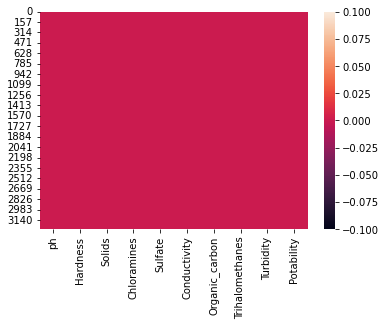

In [31]:
sns.heatmap(df.isnull())

In [32]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [34]:
x = df.drop("Potability",axis=1)
y= df["Potability"]

In [35]:
x.shape,y.shape

((3276, 9), (3276,))

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [41]:
x_train.shape,x_test.shape

((2620, 9), (656, 9))

In [42]:
y_train.shape , y_test.shape

((2620,), (656,))

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
model_lr = LogisticRegression()

In [46]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [49]:
pred_lr = model_lr.predict(x_test)

In [51]:
accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr

0.5884146341463414

In [57]:
from sklearn.ensemble  import RandomForestClassifier
#from sklearn.datasets import make_regression
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
pred_rf = model_rf.predict(x_test)

In [59]:
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

65.2439024390244